In [50]:
from pyspark.sql import SparkSession
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

In [51]:
spark = SparkSession.builder.appName("ml-cls").getOrCreate()

# Importing Dataset

In [52]:
df = spark.read.csv('D:/DataSets/Car_sales.csv', inferSchema = True, header = True)
df.show(5)

+------------+-------+------------------+-------------------+------------+------------------+-----------+----------+---------+-----+------+-----------+-------------+---------------+-------------+-----------------+
|Manufacturer|  Model|Sales_in_thousands|__year_resale_value|Vehicle_type|Price_in_thousands|Engine_size|Horsepower|Wheelbase|Width|Length|Curb_weight|Fuel_capacity|Fuel_efficiency|Latest_Launch|Power_perf_factor|
+------------+-------+------------------+-------------------+------------+------------------+-----------+----------+---------+-----+------+-----------+-------------+---------------+-------------+-----------------+
|       Acura|Integra|            16.919|              16.36|   Passenger|              21.5|        1.8|       140|    101.2| 67.3| 172.4|      2.639|         13.2|             28|     2/2/2012|      58.28014952|
|       Acura|     TL|            39.384|             19.875|   Passenger|              28.4|        3.2|       225|    108.1| 70.3| 192.9|     

In [53]:
print((df.count(), len(df.columns)))

(155, 16)


# Remove Nulls and Drop Columns 

In [54]:
from pyspark.sql.functions import isnull, when, count
df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show()

+------------+-----+------------------+-------------------+------------+------------------+-----------+----------+---------+-----+------+-----------+-------------+---------------+-------------+-----------------+
|Manufacturer|Model|Sales_in_thousands|__year_resale_value|Vehicle_type|Price_in_thousands|Engine_size|Horsepower|Wheelbase|Width|Length|Curb_weight|Fuel_capacity|Fuel_efficiency|Latest_Launch|Power_perf_factor|
+------------+-----+------------------+-------------------+------------+------------------+-----------+----------+---------+-----+------+-----------+-------------+---------------+-------------+-----------------+
|           0|    0|                 0|                 36|           0|                 0|          0|         0|        0|    0|     0|          1|            0|              2|            0|                1|
+------------+-----+------------------+-------------------+------------+------------------+-----------+----------+---------+-----+------+-----------+---

In [55]:
df = df.drop('Manufacturer')
df = df.drop('Model')
df = df.drop('__year_resale_value')
df = df.drop('Vehicle_type')
df = df.drop('Width')
df = df.drop('Length')
df = df.drop('Curb_weight')
df = df.drop('Latest_Launch')


In [56]:
from pyspark.sql.functions import isnull, when, count
df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show()

+------------------+------------------+-----------+----------+---------+-------------+---------------+-----------------+
|Sales_in_thousands|Price_in_thousands|Engine_size|Horsepower|Wheelbase|Fuel_capacity|Fuel_efficiency|Power_perf_factor|
+------------------+------------------+-----------+----------+---------+-------------+---------------+-----------------+
|                 0|                 0|          0|         0|        0|            0|              2|                1|
+------------------+------------------+-----------+----------+---------+-------------+---------------+-----------------+



In [57]:
df = df.na.drop()
df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show()

+------------------+------------------+-----------+----------+---------+-------------+---------------+-----------------+
|Sales_in_thousands|Price_in_thousands|Engine_size|Horsepower|Wheelbase|Fuel_capacity|Fuel_efficiency|Power_perf_factor|
+------------------+------------------+-----------+----------+---------+-------------+---------------+-----------------+
|                 0|                 0|          0|         0|        0|            0|              0|                0|
+------------------+------------------+-----------+----------+---------+-------------+---------------+-----------------+



In [58]:
df.show(20)

+------------------+------------------+-----------+----------+---------+-------------+---------------+-----------------+
|Sales_in_thousands|Price_in_thousands|Engine_size|Horsepower|Wheelbase|Fuel_capacity|Fuel_efficiency|Power_perf_factor|
+------------------+------------------+-----------+----------+---------+-------------+---------------+-----------------+
|            16.919|              21.5|        1.8|       140|    101.2|         13.2|             28|      58.28014952|
|            39.384|              28.4|        3.2|       225|    108.1|         17.2|             25|      91.37077766|
|             8.588|              42.0|        3.5|       210|    114.6|         18.0|             22|      91.38977933|
|            20.397|             23.99|        1.8|       150|    102.6|         16.4|             27|       62.7776392|
|             18.78|             33.95|        2.8|       200|    108.7|         18.5|             22|      84.56510502|
|              1.38|            

In [59]:
df.printSchema()

root
 |-- Sales_in_thousands: double (nullable = true)
 |-- Price_in_thousands: double (nullable = true)
 |-- Engine_size: double (nullable = true)
 |-- Horsepower: integer (nullable = true)
 |-- Wheelbase: double (nullable = true)
 |-- Fuel_capacity: double (nullable = true)
 |-- Fuel_efficiency: integer (nullable = true)
 |-- Power_perf_factor: double (nullable = true)



<AxesSubplot:>

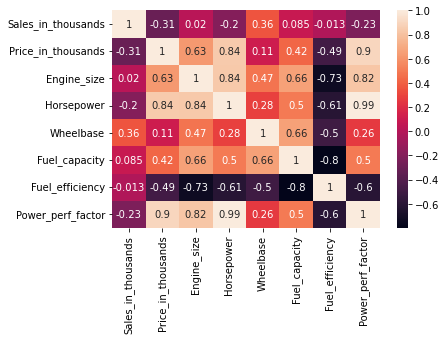

In [60]:
import seaborn as sns
sns.heatmap(df.toPandas().corr(), annot = True)

In [61]:
from pyspark.sql.functions import when
df = df.withColumn("NewFuel_efficiency", when(df["Fuel_efficiency"] <= 25, 0).otherwise(1))

In [62]:
df = df.drop("Fuel_efficiency")

In [63]:
df.show()

+------------------+------------------+-----------+----------+---------+-------------+-----------------+------------------+
|Sales_in_thousands|Price_in_thousands|Engine_size|Horsepower|Wheelbase|Fuel_capacity|Power_perf_factor|NewFuel_efficiency|
+------------------+------------------+-----------+----------+---------+-------------+-----------------+------------------+
|            16.919|              21.5|        1.8|       140|    101.2|         13.2|      58.28014952|                 1|
|            39.384|              28.4|        3.2|       225|    108.1|         17.2|      91.37077766|                 0|
|             8.588|              42.0|        3.5|       210|    114.6|         18.0|      91.38977933|                 0|
|            20.397|             23.99|        1.8|       150|    102.6|         16.4|       62.7776392|                 1|
|             18.78|             33.95|        2.8|       200|    108.7|         18.5|      84.56510502|                 0|
|       

In [64]:
X = df.drop("NewFuel_efficiency")

## Select the relevant columns as features and label

In [65]:
assembler = VectorAssembler(inputCols=X.columns , outputCol='features')
df2 = assembler.transform(df)
df2.show(5, truncate=False)


+------------------+------------------+-----------+----------+---------+-------------+-----------------+------------------+----------------------------------------------+
|Sales_in_thousands|Price_in_thousands|Engine_size|Horsepower|Wheelbase|Fuel_capacity|Power_perf_factor|NewFuel_efficiency|features                                      |
+------------------+------------------+-----------+----------+---------+-------------+-----------------+------------------+----------------------------------------------+
|16.919            |21.5              |1.8        |140       |101.2    |13.2         |58.28014952      |1                 |[16.919,21.5,1.8,140.0,101.2,13.2,58.28014952]|
|39.384            |28.4              |3.2        |225       |108.1    |17.2         |91.37077766      |0                 |[39.384,28.4,3.2,225.0,108.1,17.2,91.37077766]|
|8.588             |42.0              |3.5        |210       |114.6    |18.0         |91.38977933      |0                 |[8.588,42.0,3.5,210.0,

# Train & Test Data

In [66]:
train_data, test_data = df2.randomSplit([0.7, 0.3], seed=42)


# Use DecisionTreeClassifier

In [67]:
from pyspark.ml.classification import DecisionTreeClassifier
clf = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'NewFuel_efficiency', maxDepth = 3)


In [68]:
model = clf.fit(train_data)

In [69]:
predictions = model.transform(test_data)
predictions.select('NewFuel_efficiency').show(5)


+------------------+
|NewFuel_efficiency|
+------------------+
|                 0|
|                 1|
|                 0|
|                 0|
|                 0|
+------------------+
only showing top 5 rows



In [70]:
predictions.groupBy('NewFuel_efficiency', 'prediction').count().show()

+------------------+----------+-----+
|NewFuel_efficiency|prediction|count|
+------------------+----------+-----+
|                 1|       0.0|    3|
|                 0|       0.0|   32|
|                 1|       1.0|   10|
|                 0|       1.0|    2|
+------------------+----------+-----+



Confusion Matrix:
[[32  2]
 [ 3 10]]


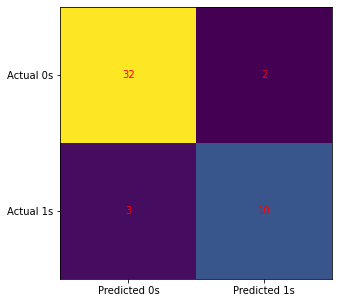

In [71]:
y_true = predictions.select('NewFuel_efficiency').rdd.flatMap(list).collect()
y_pred = predictions.select('prediction').rdd.flatMap(list).collect()

# calculate accuracy
from sklearn import metrics

cm = metrics.confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


In [72]:
#[row, column]
#(Actual, Predict)
TP = cm[1, 1]      
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

accuracy = (TN + TP) / (TN + TP + FN + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)

print('Metrics computed from a confusion matrix')
print(clf)
print("Accuracy:\t", accuracy)
print("Classification Error:", 1 - accuracy)
print("Sensitivity/Recall:\t", recall)
print("Specificity:\t", specificity)
print("Precision:\t", precision)
print("False_Positive_Rate:", 1 - TN / (TN + FP))
print('###########################################')

Metrics computed from a confusion matrix
DecisionTreeClassifier_dee84fce0a0d
Accuracy:	 0.8936170212765957
Classification Error: 0.1063829787234043
Sensitivity/Recall:	 0.7692307692307693
Specificity:	 0.9411764705882353
Precision:	 0.8333333333333334
False_Positive_Rate: 0.05882352941176472
###########################################


# Use RandomForestClassifier

In [24]:
from pyspark.ml.classification import RandomForestClassifier
clf = RandomForestClassifier(labelCol='NewFuel_efficiency', featuresCol='features', maxDepth=5)

#combines the output of multiple decison tree to reach a single results

In [25]:
model = clf.fit(train_data)


In [26]:
predictions = model.transform(test_data)
predictions.select('NewFuel_efficiency').show(5)


+------------------+
|NewFuel_efficiency|
+------------------+
|                 0|
|                 1|
|                 0|
|                 0|
|                 0|
+------------------+
only showing top 5 rows



In [48]:
predictions.groupBy('NewFuel_efficiency', 'prediction').count().show()

+------------------+----------+-----+
|NewFuel_efficiency|prediction|count|
+------------------+----------+-----+
|                 1|       0.0|    3|
|                 0|       0.0|   32|
|                 1|       1.0|   10|
|                 0|       1.0|    2|
+------------------+----------+-----+



Confusion Matrix:
[[33  1]
 [ 3 10]]


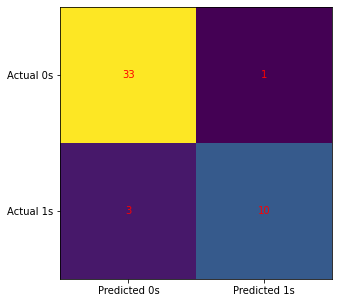

In [27]:
y_true = predictions.select('NewFuel_efficiency').rdd.flatMap(list).collect()
y_pred = predictions.select('prediction').rdd.flatMap(list).collect()

# calculate accuracy
from sklearn import metrics

cm = metrics.confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


In [28]:
#[row, column]
#(Actual, Predict)
TP = cm[1, 1]      
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

accuracy = (TN + TP) / (TN + TP + FN + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)

print('Metrics computed from a confusion matrix')
print(clf)
print("Accuracy:\t", accuracy)
print("Classification Error:", 1 - accuracy)
print("Sensitivity/Recall:\t", recall)
print("Specificity:\t", specificity)
print("Precision:\t", precision)
print("False_Positive_Rate:", 1 - TN / (TN + FP))
print('###########################################')

Metrics computed from a confusion matrix
RandomForestClassifier_c7528132a555
Accuracy:	 0.9148936170212766
Classification Error: 0.08510638297872342
Sensitivity/Recall:	 0.7692307692307693
Specificity:	 0.9705882352941176
Precision:	 0.9090909090909091
False_Positive_Rate: 0.02941176470588236
###########################################


# Gradient_Boosted Tree Classifier Model

In [43]:
# Gradient-boosted Tree classifier Model
#to solve classification and regression problem 
#ensemble technique where the performance of the modeule o,proves over iteration
from pyspark.ml.classification import GBTClassifier
clf = GBTClassifier(labelCol = 'NewFuel_efficiency', featuresCol = 'features')

In [44]:
model = clf.fit(train_data)

In [45]:
predictions = model.transform(test_data)
predictions.select('NewFuel_efficiency').show(5)


+------------------+
|NewFuel_efficiency|
+------------------+
|                 0|
|                 1|
|                 0|
|                 0|
|                 0|
+------------------+
only showing top 5 rows



In [49]:
predictions.groupBy('NewFuel_efficiency', 'prediction').count().show()

+------------------+----------+-----+
|NewFuel_efficiency|prediction|count|
+------------------+----------+-----+
|                 1|       0.0|    3|
|                 0|       0.0|   32|
|                 1|       1.0|   10|
|                 0|       1.0|    2|
+------------------+----------+-----+



Confusion Matrix:
[[32  2]
 [ 3 10]]


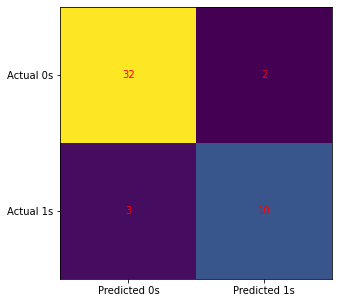

In [46]:
y_true = predictions.select('NewFuel_efficiency').rdd.flatMap(list).collect()
y_pred = predictions.select('prediction').rdd.flatMap(list).collect()

# calculate accuracy
from sklearn import metrics

cm = metrics.confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


In [47]:
#[row, column]
#(Actual, Predict)
TP = cm[1, 1]      
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

accuracy = (TN + TP) / (TN + TP + FN + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)

print('Metrics computed from a confusion matrix')
print(clf)
print("Accuracy:\t", accuracy)
print("Classification Error:", 1 - accuracy)
print("Sensitivity/Recall:\t", recall)
print("Specificity:\t", specificity)
print("Precision:\t", precision)
print("False_Positive_Rate:", 1 - TN / (TN + FP))
print('###########################################')

Metrics computed from a confusion matrix
GBTClassifier_2122de27d813
Accuracy:	 0.8936170212765957
Classification Error: 0.1063829787234043
Sensitivity/Recall:	 0.7692307692307693
Specificity:	 0.9411764705882353
Precision:	 0.8333333333333334
False_Positive_Rate: 0.05882352941176472
###########################################
